In [132]:
# Findings / Observations
print("1.) The closer the latitude is to 0, the higher the temperature gets. This is true for both the Northern Hempishpere and the Southern Hemisphere.")
print("2.) There tends to be more clouds in the Northern Hemisphere than the Southern Hemisphere. Additionally, clouds are more prevelant the further you get from a 0 latitude.") 
print("3.) Overall, when comparing the temperatures in the North vs the South, temperatures tend to be higher in the Northern Hemisphere than the Southern Hemisphere.")

1.) The closer the latitude is to 0, the higher the temperature gets. This is true for both the Northern Hempishpere and the Southern Hemisphere.
2.) There tends to be more clouds in the Northern Hemisphere than the Southern Hemisphere. Additionally, clouds are more prevelant the further you get from a 0 latitude.
3.) Overall, when comparing the temperatures in the North vs the South, temperatures tend to be higher in the Northern Hemisphere than the Southern Hemisphere.


In [ ]:
# import dependencies 
import random 
import pandas as pd
import time 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import csv
from citipy import citipy
import urllib
import scipy.stats as st
from scipy.stats import linregress

In [75]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

590

In [76]:
city_list = []
cloudiness = []
country = []
date = []
humidity = []
lat_list = []
lng_list = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1

In [77]:
import requests
from config import api_key

In [78]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
api_key = "05c562a0eea8ca8dc3cd57af3c89bd92"
appid = api_key
settings = {"units": "imperial", "appid": api_key}
url = f"{url}appid={api_key}&units={units}"
url

'http://api.openweathermap.org/data/2.5/weather?appid=05c562a0eea8ca8dc3cd57af3c89bd92&units=imperial'

In [79]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : atuona
Processing Record 2 of Set 1 : busselton
City not found. Skipping...
Processing Record 3 of Set 1 : lixourion
Processing Record 4 of Set 1 : mataura
Processing Record 5 of Set 1 : cay
Processing Record 6 of Set 1 : ushuaia
Processing Record 7 of Set 1 : tessalit
Processing Record 8 of Set 1 : san rafael
Processing Record 9 of Set 1 : vardo
Processing Record 10 of Set 1 : saint george
Processing Record 11 of Set 1 : bredasdorp
Processing Record 12 of Set 1 : bluff
Processing Record 13 of Set 1 : zhangjiakou
Processing Record 14 of Set 1 : kavaratti
Processing Record 15 of Set 1 : carnarvon
Processing Record 16 of Set 1 : acajutla
Processing Record 17 of Set 1 : hasaki
Processing Record 18 of Set 1 : saskylakh
Processing Record 19 of Set 1 : tiarei
Processing Record 20 of Set 1 : tuktoyaktuk
Processing Record 21 of Set 1 : aksu
Processing Record 22 of Set 1 : beroroha
Processing Record 23 of Set

In [82]:
weather_dic = pd.DataFrame({ 
                "City" : city_list,
                "Cloudiness" : cloudiness,
                "Country" : country,
                "Date" : date,
                "Humidity" : humidity,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed})

In [83]:
weather_dic.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

In [84]:
weather_dic

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Atuona,11,PF,1624628464,76,-9.8000,-139.0333,78.87,15.23
1,Busselton,39,AU,1624628464,82,-33.6500,115.3333,53.04,10.18
2,Lixouri,0,GR,1624628464,27,38.2019,20.4314,100.40,16.11
3,Mataura,100,NZ,1624628465,98,-46.1927,168.8643,48.47,1.23
4,Çay,17,TR,1624628465,38,38.5917,31.0286,80.15,14.20
...,...,...,...,...,...,...,...,...,...
549,Sibi,0,PK,1624628321,12,29.5448,67.8764,109.29,11.10
550,Sheltozero,57,RU,1624628611,70,61.3667,35.3667,70.86,7.63
551,Płock,100,PL,1624628611,78,52.5468,19.7064,71.56,6.76
552,Rafai,31,CF,1624628611,36,4.9500,23.9167,91.60,3.94


In [85]:
weather_dic.to_csv("data/weather_cities.csv", index = False)


In [86]:
# Charts

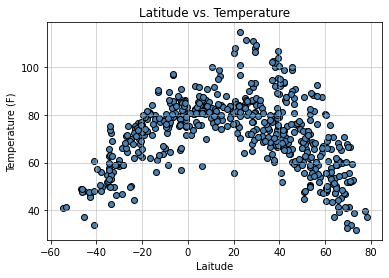

In [130]:
plt.scatter(weather_dic["Lat"], weather_dic["Max Temp"], facecolor = "steelblue", edgecolor = "black")
plt.title("Latitude vs. Temperature")
plt.xlabel("Laitude")
plt.ylabel("Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("Figures/Latitude vs Temperature.png")

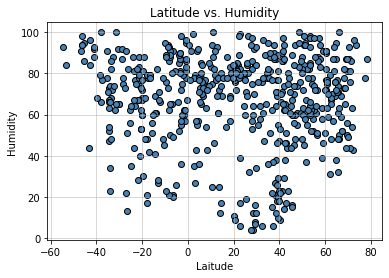

In [88]:
plt.scatter(weather_dic["Lat"], weather_dic["Humidity"], facecolor = "steelblue", edgecolor = "black")
plt.title("Latitude vs. Humidity")
plt.xlabel("Laitude")
plt.ylabel("Humidity")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("Figures/Latitude vs Humidity.png")

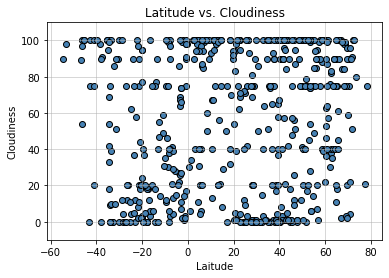

In [89]:
plt.scatter(weather_dic["Lat"], weather_dic["Cloudiness"], facecolor = "steelblue", edgecolor = "black")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness")
plt.ylim(-10,110)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("Figures/Latitude vs Cloudiness.png")

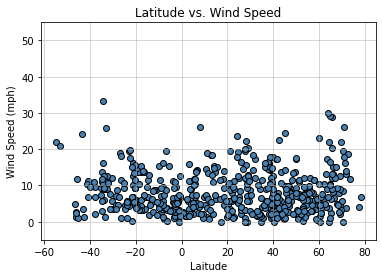

In [90]:
plt.scatter(weather_dic["Lat"], weather_dic["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-5,55)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("Figures/Latitude vs Wind Speed.png")

In [91]:
# Regression

In [92]:
northern_hem = weather_dic.loc[weather_dic["Lat"] >= 0]
southern_hem = weather_dic.loc[weather_dic["Lat"] < 0]

r-squared is : -0.64


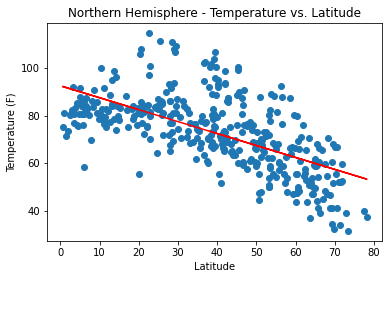

In [105]:
def linear_agression(x,y):
    print(f"r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=18,color="red")

equation = linear_agression(northern_hem["Lat"], northern_hem["Max Temp"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.savefig("Figures/Northern_Hemisphere_Temp_Vs_Latitude.png")

r-squared is : 0.79


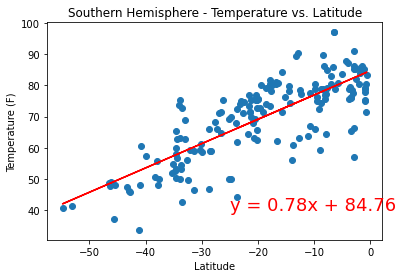

In [108]:
equation = linear_agression(southern_hem["Lat"],southern_hem["Max Temp"])
annotate(equation, -25, 40)
plt.title("Southern Hemisphere - Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.savefig("Figures/Southern_Hemisphere_Temp_Vs_Latitude.png")

r-squared is : 0.04


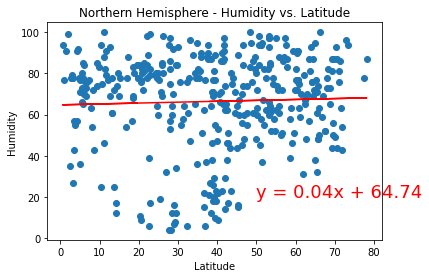

In [117]:
equation = linear_agression(northern_hem["Lat"], northern_hem["Humidity"])
annotate(equation, 50, 20)
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("Figures/Northern_Hemisphere_Humid_Vs_Latitude.png")

r-squared is : -0.1


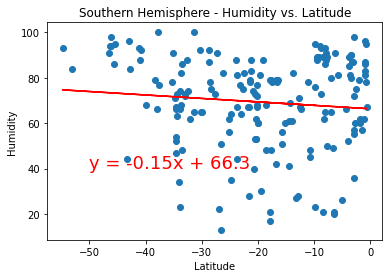

In [113]:
equation = linear_agression(southern_hem["Lat"], southern_hem["Humidity"])
annotate(equation, -50, 40)
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("Figures/Southern_Hemisphere_Humid_Vs_Latitude.png")


r-squared is : 0.03


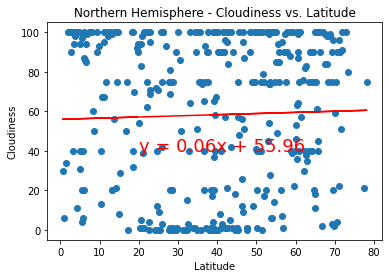

In [119]:
equation = linear_agression(northern_hem["Lat"], northern_hem["Cloudiness"])
annotate(equation, 20, 40)
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("Figures/Northern_Hemisphere_Cloudiness_Vs_Latitude.png")

r-squared is : -0.12


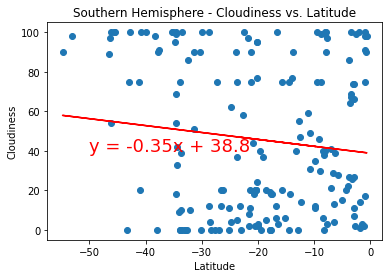

In [122]:
equation = linear_agression(southern_hem["Lat"], southern_hem["Cloudiness"])
annotate(equation, -50, 40)
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("Figures/Southern_Hemisphere_Cloudiness_Vs_Latitude.png")

r-squared is : 0.06


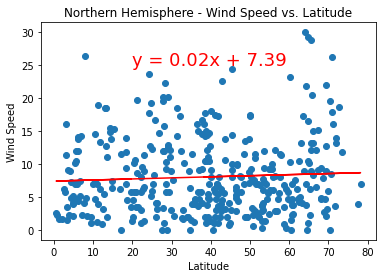

In [126]:
equation = linear_agression(northern_hem["Lat"], northern_hem["Wind Speed"])
annotate(equation, 20, 25)
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("Figures/Northern_Hemisphere_Wind_Vs_Latitude.png")

r-squared is : -0.28


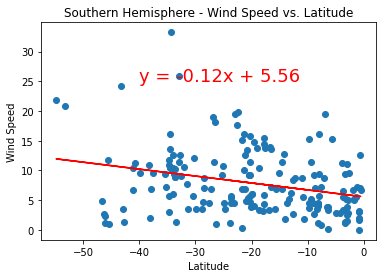

In [129]:
equation = linear_agression(southern_hem["Lat"], southern_hem["Wind Speed"])
annotate(equation, -40, 25)
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("Figures/Southern_Hemisphere_Wind_Vs_Latitude.png")